# Fase 1: Detección del problema

### Contexto:

Este dataset contiene información sobre tumores mamarios obtenida mediante imágenes digitales de células. El objetivo es **predecir si un tumor es benigno o maligno basándose en ciertas características de las células**.

### Definición del problema:

Queremos construir un modelo de clasificación que, dado un conjunto de características de un tumor, pueda **predecir si es benigno o maligno**. Este tipo de modelo es muy relevante en el ámbito médico, ya que un diagnóstico oportuno y preciso puede salvar vidas.

### Métrica de éxito:

Dado que se trata de un problema médico, es fundamental **minimizar los falsos negativos**, es decir, casos en los que el modelo no identifica correctamente un tumor maligno. Por tanto, además de la precisión general, **se evaluarán métricas como el recall y el F1-Score.**

# Fase 2: Extracción y Limpieza de Datos

### Extracción de datos:
- El dataset se carga directamente desde sklearn, y se crea un DataFrame para facilitar su manipulación.

### Limpieza de datos:
- Se revisan los valores nulos o faltantes.
- Se verifica la distribución de las clases de la variable objetivo para entender si el dataset está balanceado.

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Cargar el dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target # data['target']

In [3]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [4]:
X = df.drop(columns='target')
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
y = df['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [6]:
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [7]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

# Fase 3: Análisis Exploratorio de Datos (30 minutos)

### Visualización de la distribución de las características:
Se generan histogramas para las principales características del dataset con el fin de observar su distribución y posibles valores atípicos.

### Correlación entre variables:
Se calcula la matriz de correlación entre todas las variables del dataset. Esto permite identificar:

### Características que están altamente correlacionadas entre sí, lo que podría llevar a problemas de multicolinealidad.
Características que tienen mayor correlación con la variable objetivo, lo que podría indicar su relevancia para el modelo.

Discusión de insights:
El equipo debe discutir qué características parecen ser más relevantes para predecir si un tumor es maligno o benigno. Algunas preguntas guía:

¿Qué características muestran distribuciones más diferenciadas entre tumores malignos y benignos?
¿Existen patrones claros en los datos que puedan ser utilizados por el modelo?

In [8]:
numeric_df = df.select_dtypes(include=['number']).drop(columns='target')
numeric_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

C:\Users\anala\AppData\Local\Temp\ipykernel_20340\1082176760.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\anala\AppData\Local\Temp\ipykernel_20340\1082176760.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\anala\AppData\Local\Temp\ipykernel_20340\1082176760.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\anala\AppData\Local\Temp\ipykernel_20340\1082176760.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\anala\AppData\Local\Temp\ipykernel_20340\1082176760.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\anala\AppData\Local\Temp\ipykernel_20340\1082176760.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\anala\AppData\Local\Temp\ipykernel_20340\1082176760.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\anal

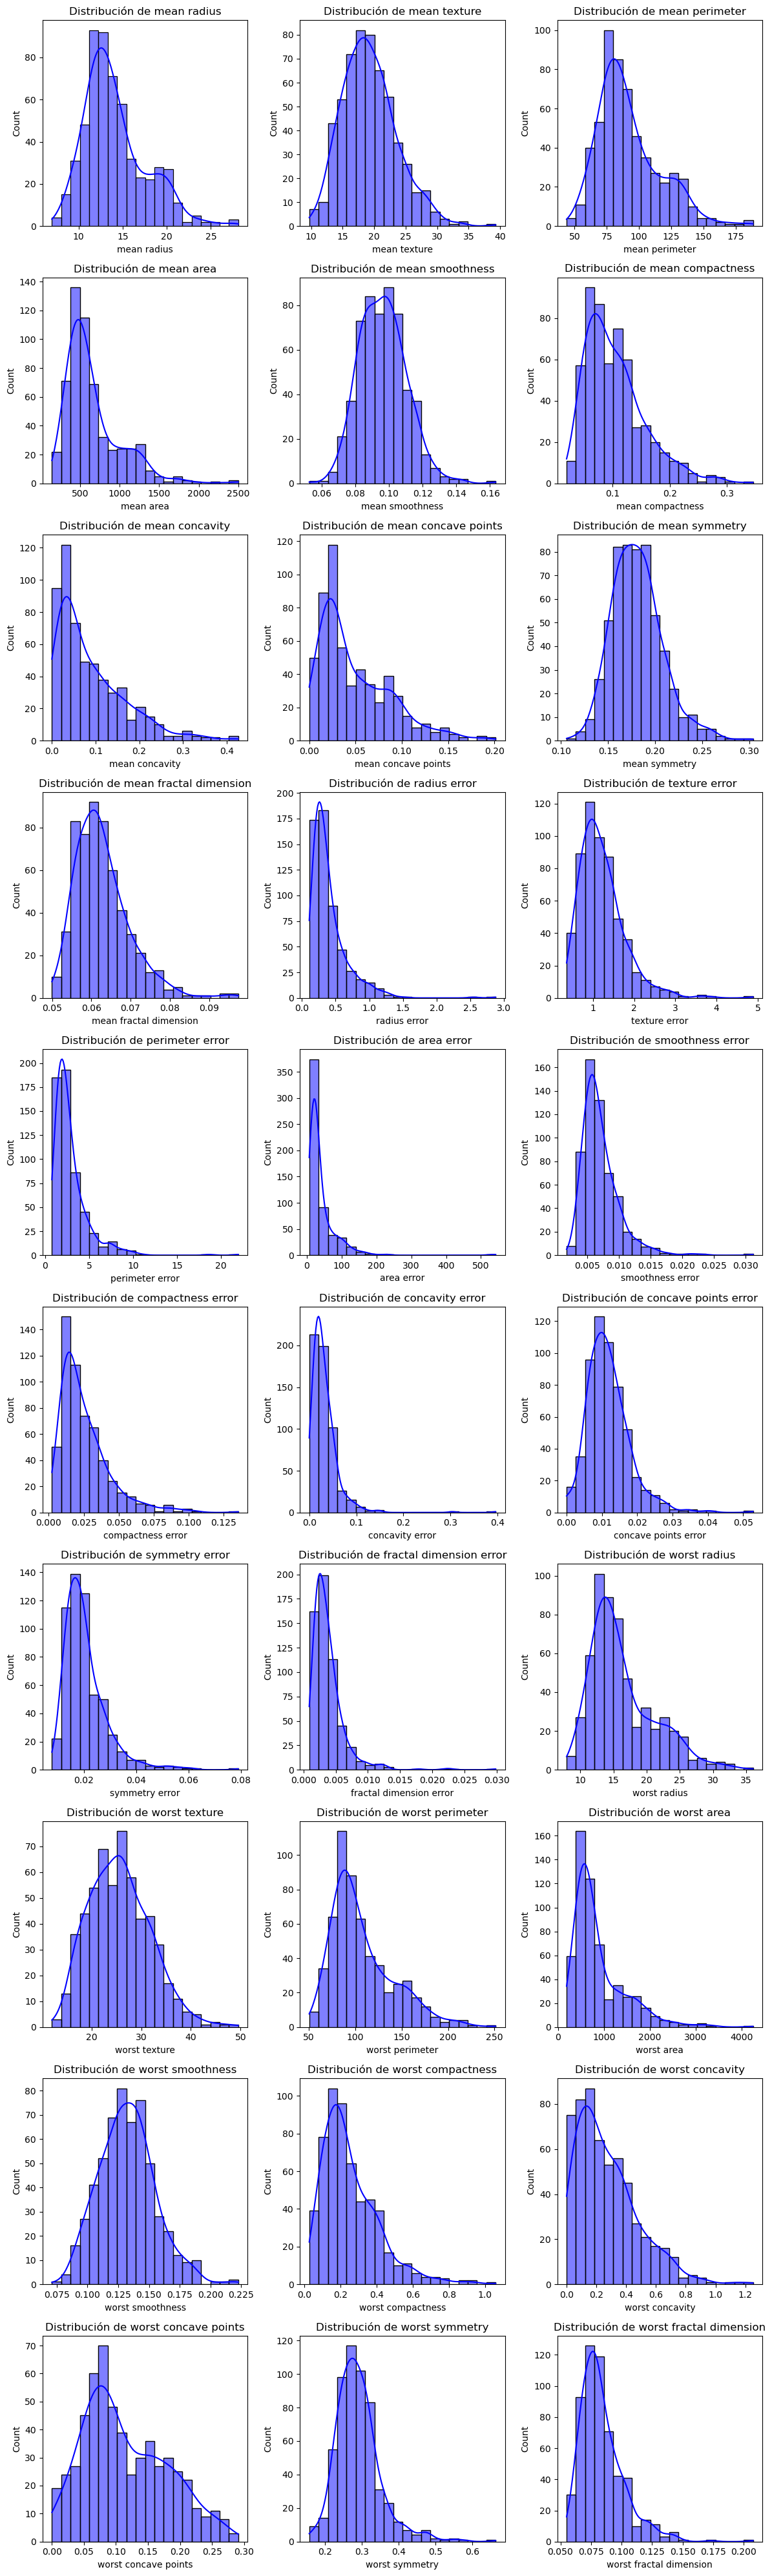

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aumentar el tamaño de la cuadrícula
num_cols = len(numeric_df.columns)
rows = (num_cols // 3) + (num_cols % 3 > 0)  # Calcula el número de filas necesario

plt.figure(figsize=(12, rows * 4))  # Ajusta el tamaño general de la figura
for i, col in enumerate(numeric_df.columns, 1):
    plt.subplot(rows, 3, i)  # Ajusta filas y columnas dinámicamente
    sns.histplot(numeric_df[col], kde=True, bins=20, color='blue')
    plt.title(f'Distribución de {col}')
    plt.tight_layout()

plt.show()

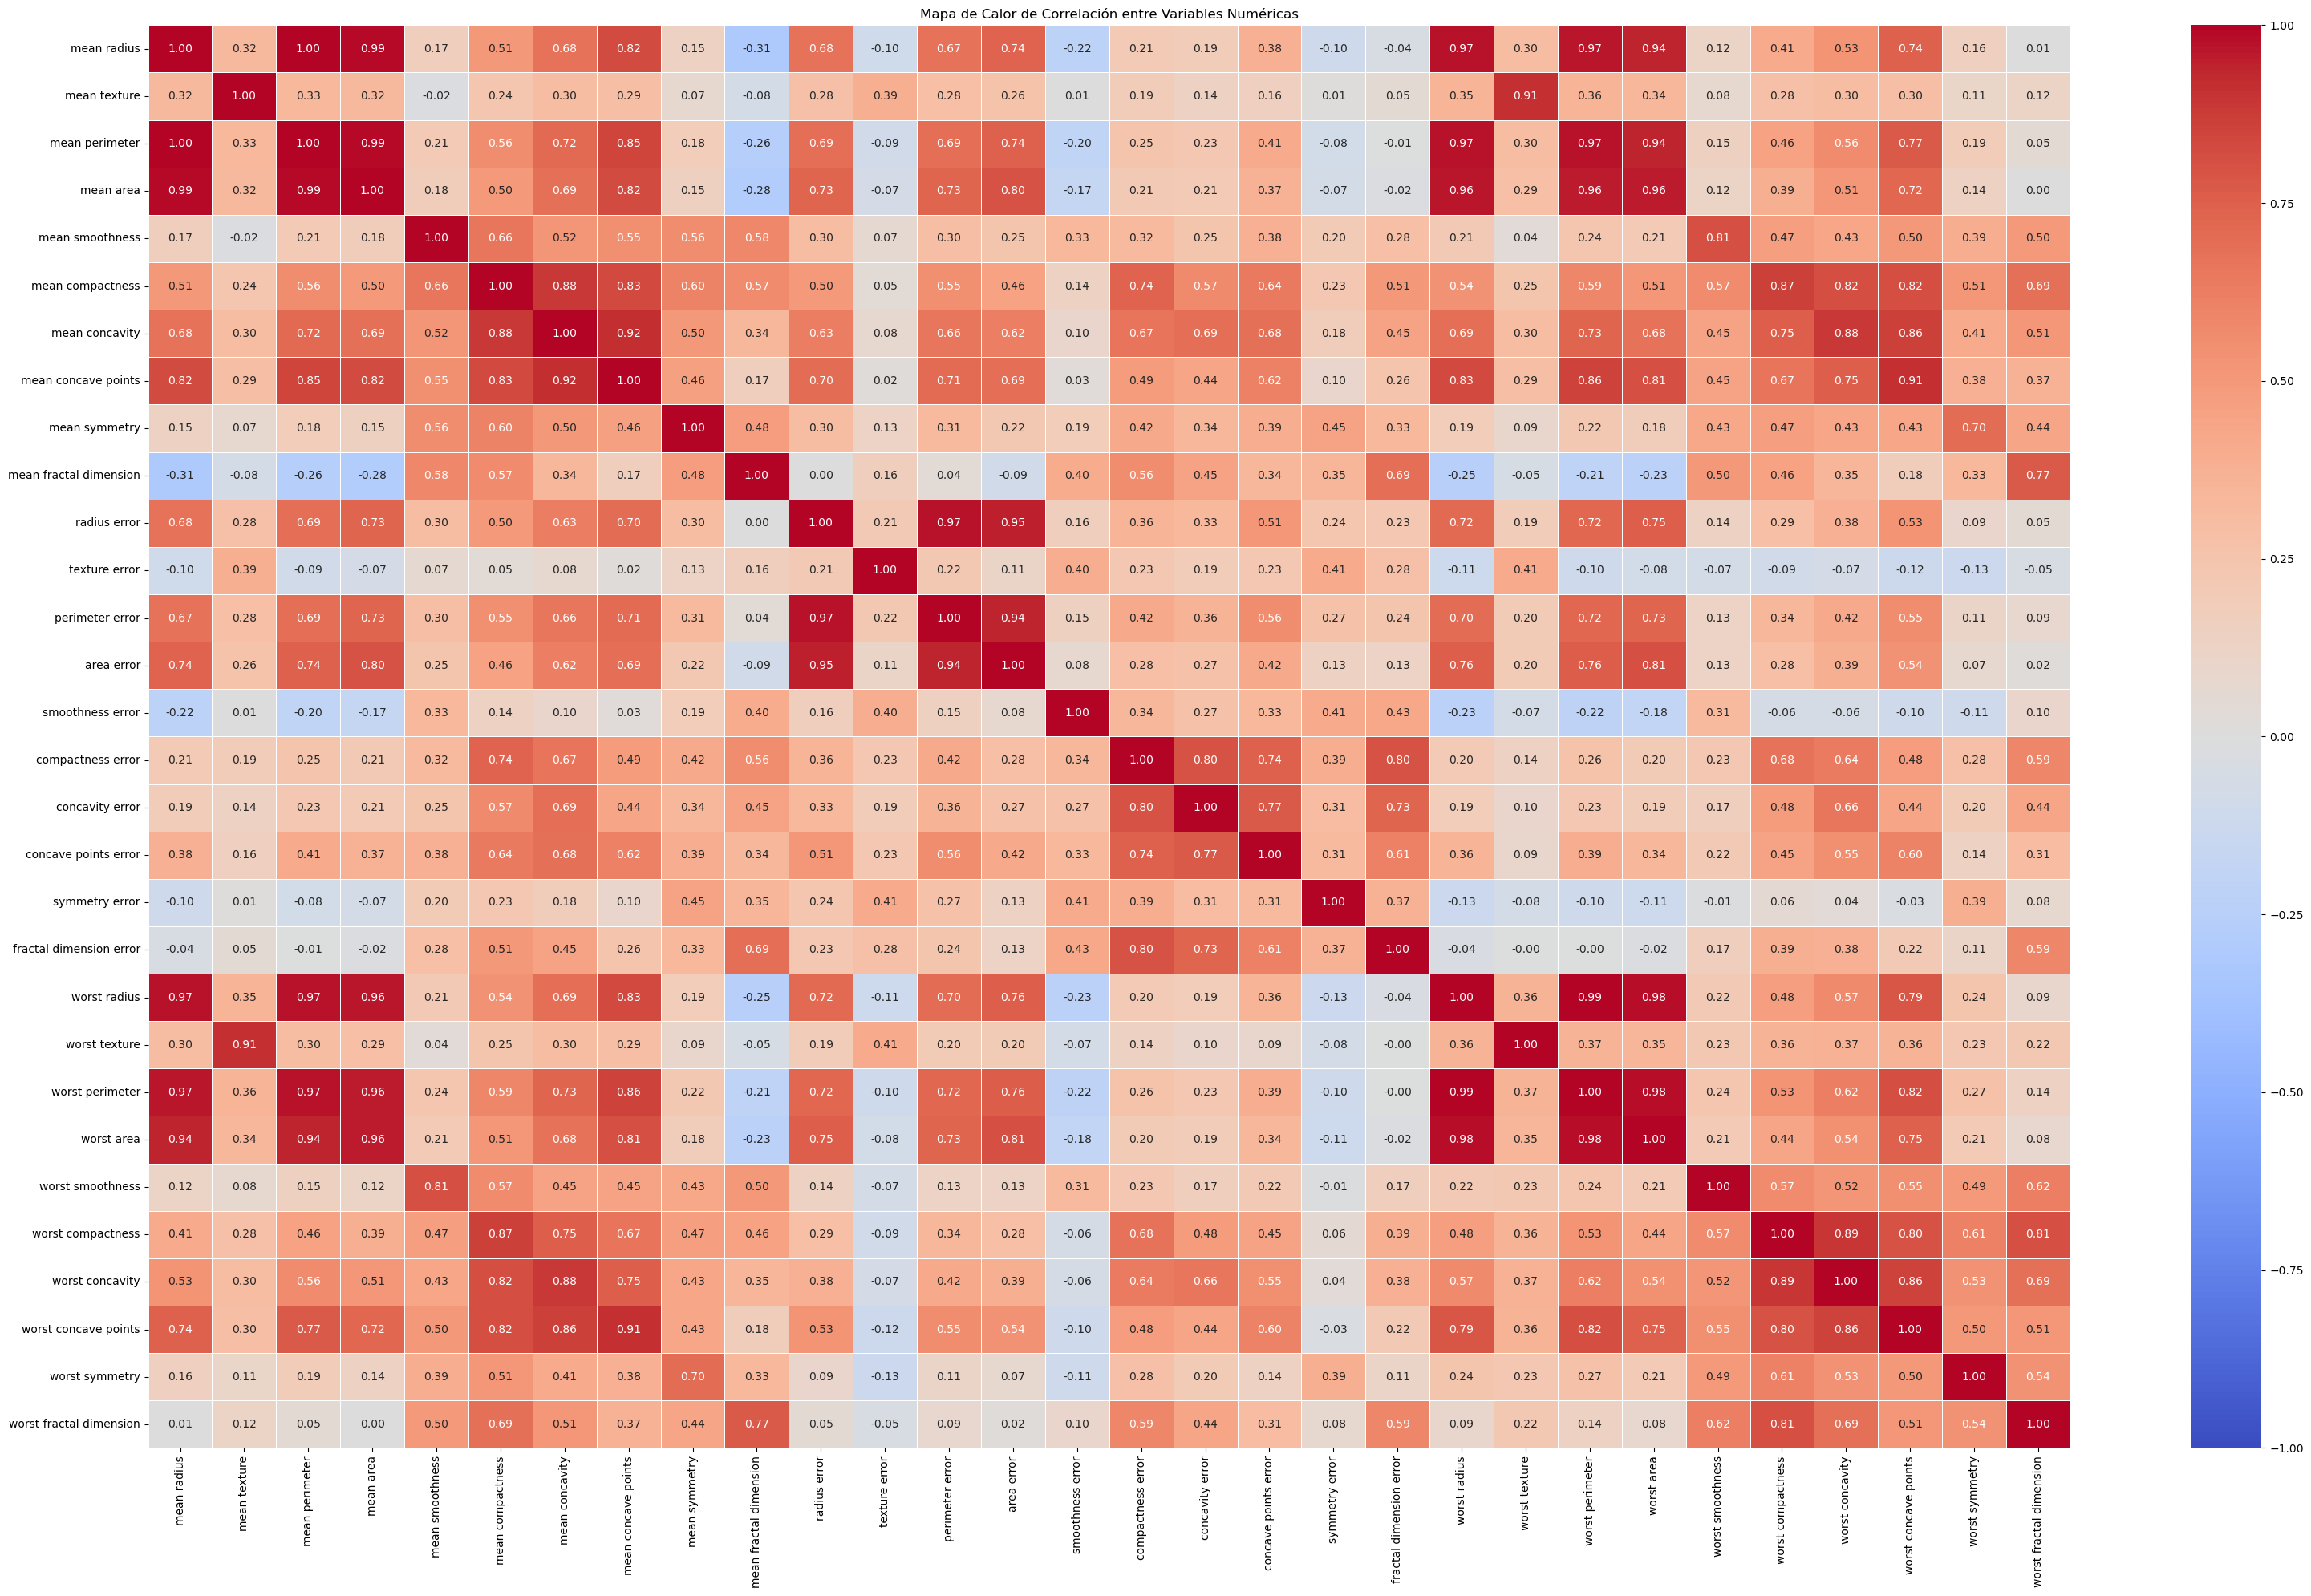

In [17]:
numeric_df = df.select_dtypes(include=['number']).drop(columns='target')
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(32, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlación entre Variables Numéricas')
plt.tight_layout()
plt.show()

C:\Users\anala\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


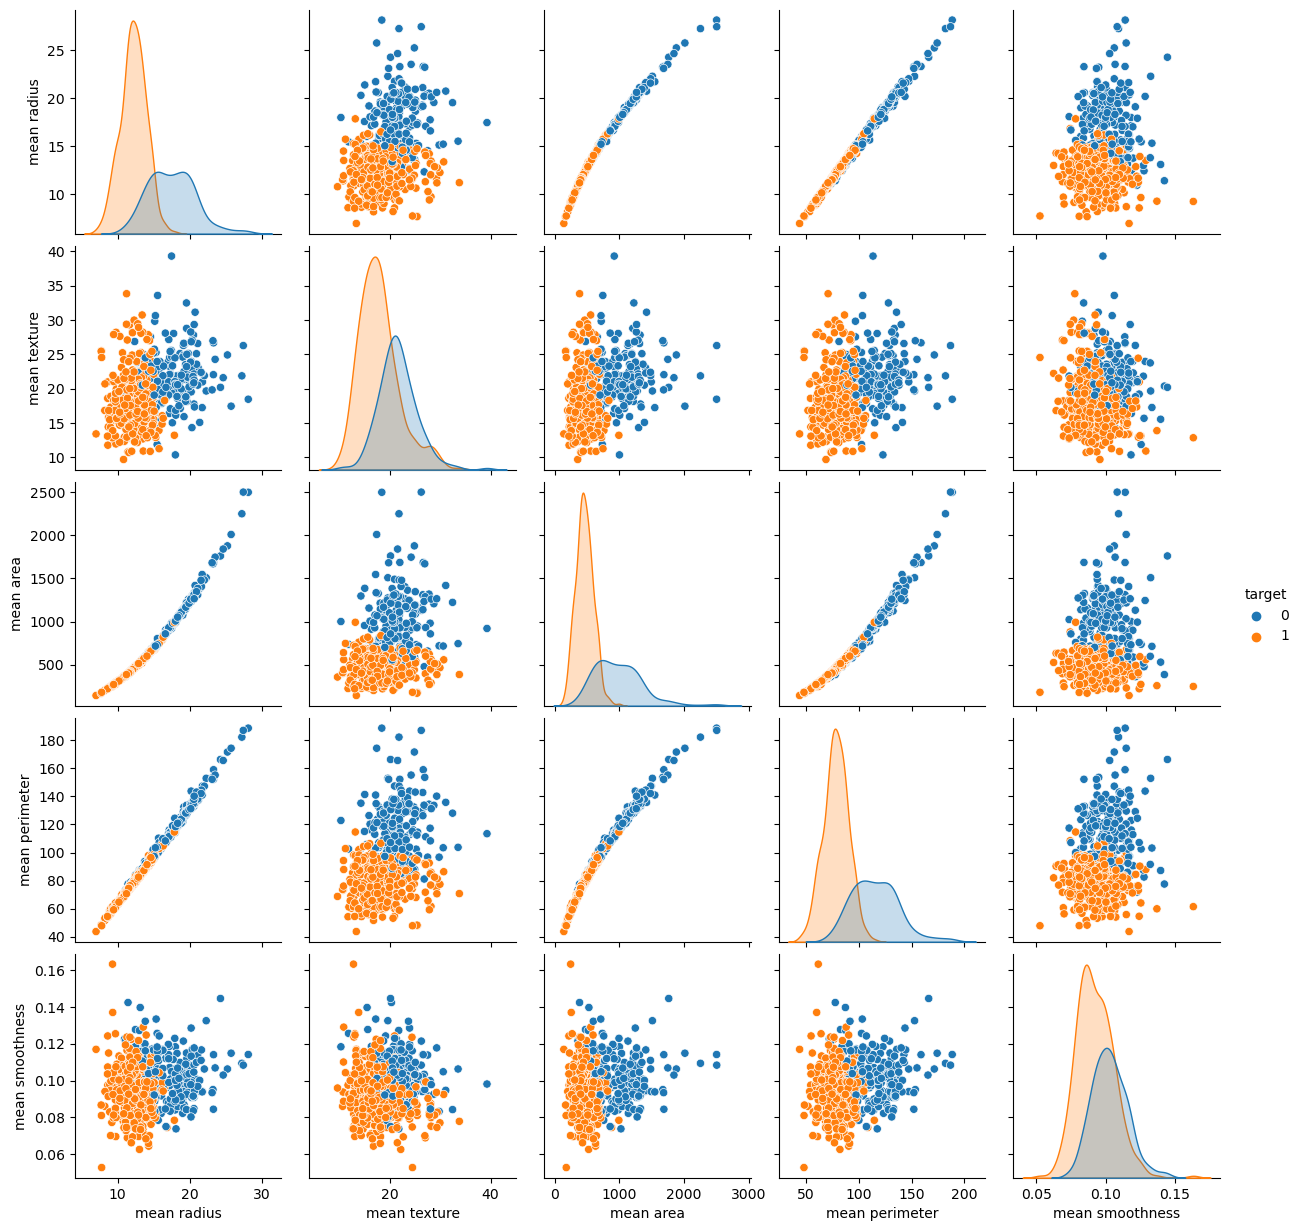

In [14]:
sns.pairplot(df,hue = 'target', vars= ['mean radius','mean texture', 'mean area', 'mean perimeter', 'mean smoothness'])

In [ ]:
guik

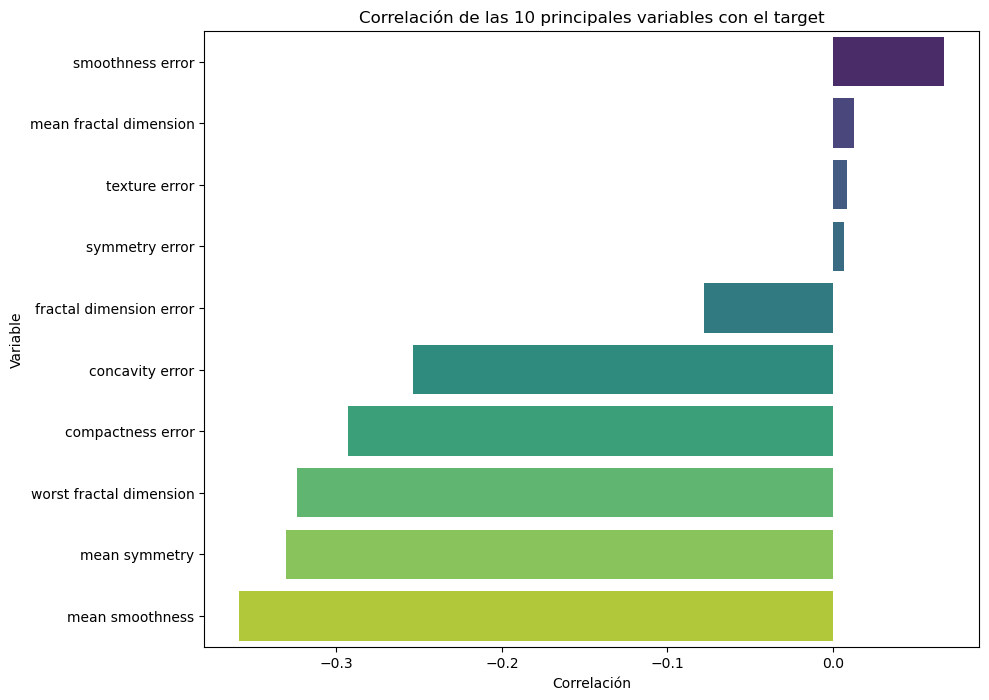

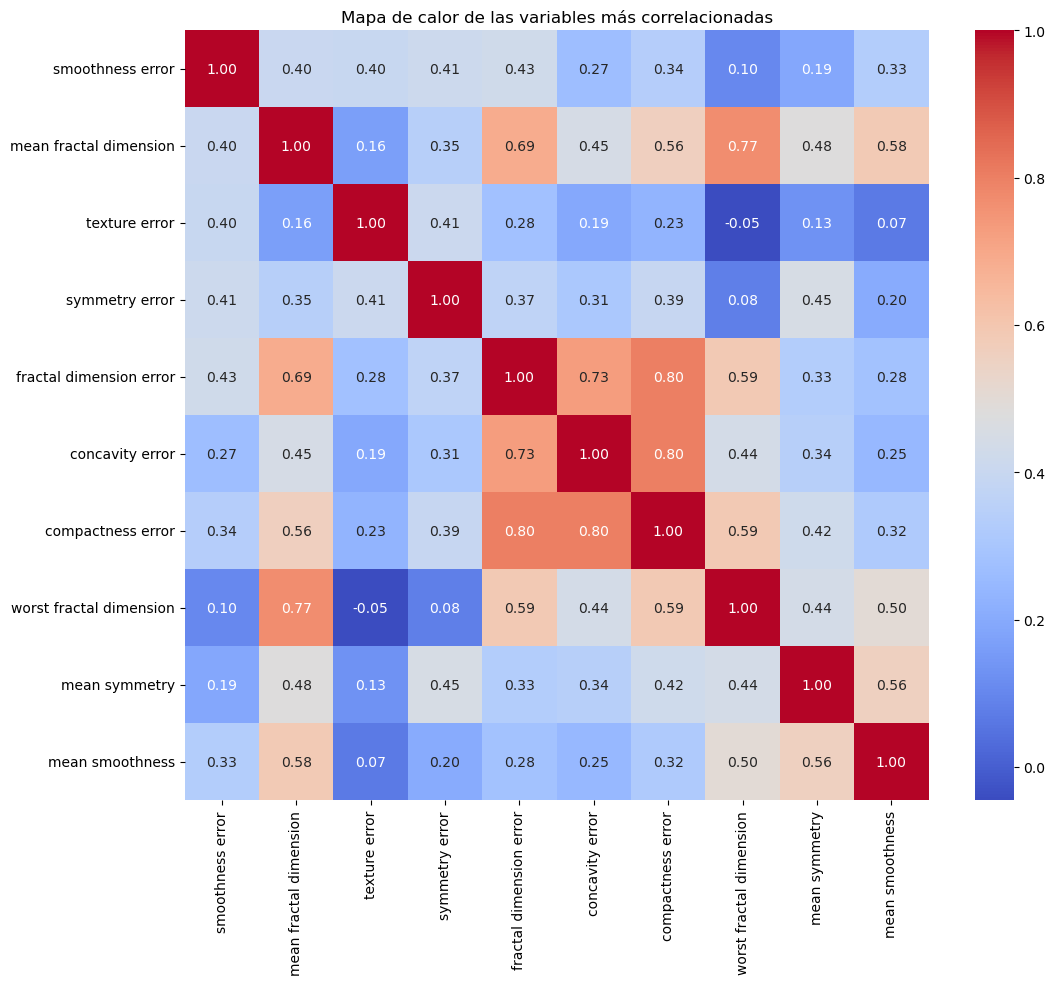

Variables relevantes seleccionadas: ['worst fractal dimension', 'mean symmetry', 'mean smoothness', 'concave points error', 'mean texture', 'worst symmetry', 'worst smoothness', 'worst texture', 'area error', 'perimeter error', 'radius error', 'worst compactness', 'mean compactness', 'worst concavity', 'mean concavity', 'mean area', 'mean radius', 'worst area', 'mean perimeter', 'worst radius', 'mean concave points', 'worst perimeter', 'worst concave points']


In [15]:
# Calcular la correlación de Pearson
correlations = df.corr()

# Correlación de las variables con el target
correlation_with_target = correlations['target'].drop('target').sort_values(ascending=False)

# Visualizar las 10 variables más correlacionadas con el target
top_features = correlation_with_target.head(10).index
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_with_target[top_features], y=top_features, palette="viridis")
plt.title("Correlación de las 10 principales variables con el target")
plt.xlabel("Correlación")
plt.ylabel("Variable")
plt.show()

# Mapa de calor para las variables más correlacionadas
plt.figure(figsize=(12, 10))
sns.heatmap(df[top_features].corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Mapa de calor de las variables más correlacionadas")
plt.show()

# Identificar las variables relevantes (absoluta > 0.3 como criterio)
relevant_features = correlation_with_target[correlation_with_target.abs() > 0.3].index
print(f"Variables relevantes seleccionadas: {list(relevant_features)}")

# Fase 4: Entrenamiento del modelo con validación cruzada (30 minutos)
### División del dataset:
El dataset se divide en entrenamiento y prueba, asegurando que el modelo se entrene con un 70% de los datos y se evalúe con el 30% restante.

### Validación cruzada:
Antes de evaluar el modelo final, se aplica cross-validation para obtener una estimación más precisa del rendimiento del modelo. La validación cruzada divide los datos en múltiples subconjuntos y entrena el modelo en cada uno de ellos, lo que reduce el riesgo de sobreajuste y proporciona una evaluación más robusta.

### Discusión:
El equipo debe discutir por qué la validación cruzada es importante, especialmente en este tipo de problemas donde el rendimiento del modelo puede variar dependiendo del conjunto de datos con el que se entrene.

Resultados para Regresión Logística:

Matriz de Confusión:
[[ 0 42]
 [ 0 72]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.63      1.00      0.77        72

    accuracy                           0.63       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.40      0.63      0.49       114



C:\Users\anala\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anala\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anala\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


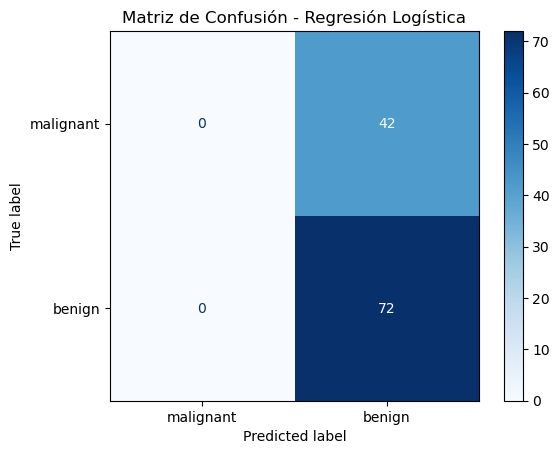

Resultados para Bosque Aleatorio:

Matriz de Confusión:
[[30 12]
 [ 5 67]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.86      0.71      0.78        42
           1       0.85      0.93      0.89        72

    accuracy                           0.85       114
   macro avg       0.85      0.82      0.83       114
weighted avg       0.85      0.85      0.85       114



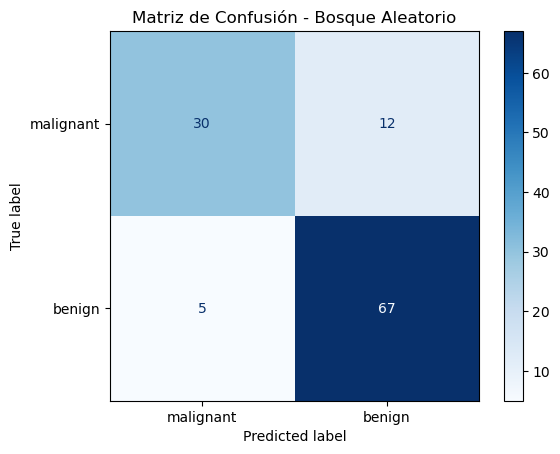

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Seleccionar las 10 variables más relevantes
correlations = df.corr()
X = df[['']]  # Variables predictoras
y = df['target']         # Variable objetivo

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Modelo 1: Regresión Logística
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Modelo 2: Bosque Aleatorio
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluar modelos con matriz de confusión y métricas
def evaluate_model(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    print(f"Resultados para {model_name}:\n")
    print("Matriz de Confusión:")
    print(cm)
    print("\nReporte de Clasificación:")
    print(classification_report(y_true, y_pred))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
    disp.plot(cmap='Blues')
    plt.title(f"Matriz de Confusión - {model_name}")
    plt.show()

# Evaluar Regresión Logística
evaluate_model(y_test, y_pred_logistic, "Regresión Logística")

# Evaluar Bosque Aleatorio
evaluate_model(y_test, y_pred_rf, "Bosque Aleatorio")


In [ ]:
X.columns

In [ ]:
X_2 = ['smoothness error', 'mean fractal dimension', 'texture error',
       'symmetry error', 'fractal dimension error', 'concavity error',
       'compactness error', 'worst fractal dimension', 'mean symmetry',
       'mean smoothness', 'concave points error', 'mean texture',
       'worst symmetry', 'worst smoothness', 'worst texture', 'area error',
       'perimeter error', 'radius error', 'worst compactness',
       'mean compactness', 'worst concavity', 'mean concavity', 'mean area',
       'mean radius', 'worst area', 'mean perimeter', 'worst radius',
       'mean concave points', 'worst perimeter', 'worst concave points']
len(X_2)

In [ ]:
X

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Seleccionar las 10 variables más relevantes
correlations = df.corr()
correlation_with_target = correlations['target'].drop('target').sort_values(ascending=False)
top_10_features = correlation_with_target.head(30).index
#X = df[top_10_features]  # Variables predictoras #2
X = df.drop(columns='target')
y = df['target']         # Variable objetivo

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Modelo 1: Regresión Logística
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Modelo 2: Bosque Aleatorio
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluar modelos con matriz de confusión y métricas
def evaluate_model(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    print(f"Resultados para {model_name}:\n")
    print("Matriz de Confusión:")
    print(cm)
    print("\nReporte de Clasificación:")
    print(classification_report(y_true, y_pred))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
    disp.plot(cmap='Blues')
    plt.title(f"Matriz de Confusión - {model_name}")
    plt.show()

# Evaluar Regresión Logística
evaluate_model(y_test, y_pred_logistic, "Regresión Logística")

# Evaluar Bosque Aleatorio
evaluate_model(y_test, y_pred_rf, "Bosque Aleatorio")


In [ ]:
df_0 = df[df['target']==0]
df_1 = df[df['target']==1]
min_size = min(len(df_0), len(df_1))
df_0_sampled = df_0.sample(n=min_size, random_state=42)
df_1_sampled = df_1.sample(n=min_size, random_state=42)

In [ ]:
balanced_df = pd.concat([df_0_sampled, df_1_sampled]).sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Seleccionar las 10 variables más relevantes
correlations = df.corr()
correlation_with_target = correlations['target'].drop('target').sort_values(ascending=False)
top_10_features = correlation_with_target.head(30).index
#X = df[top_10_features]  # Variables predictoras #2
X = df.drop(columns='target')
y = df['target']         # Variable objetivo

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Modelo 1: Regresión Logística
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Modelo 2: Bosque Aleatorio
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluar modelos con matriz de confusión y métricas
def evaluate_model(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    print(f"Resultados para {model_name}:\n")
    print("Matriz de Confusión:")
    print(cm)
    print("\nReporte de Clasificación:")
    print(classification_report(y_true, y_pred))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
    disp.plot(cmap='Blues')
    plt.title(f"Matriz de Confusión - {model_name}")
    plt.show()

# Evaluar Regresión Logística
evaluate_model(y_test, y_pred_logistic, "Regresión Logística")

# Evaluar Bosque Aleatorio
evaluate_model(y_test, y_pred_rf, "Bosque Aleatorio")

In [ ]:
# Función para reentrenar el modelo y evaluar con el conjunto de prueba
def get_best_model_with_confusion_matrix(X_train, X_test, y_train, y_test, model_name, model):
    print(f"\n--- Mejor Modelo: {model_name} ---\n")
    # Reentrenar el modelo en el conjunto completo de entrenamiento
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Evaluar y mostrar la matriz de confusión
    evaluate_model(y_test, y_pred, model_name)

# Realizar validación cruzada para ambos modelos
logistic_cv_scores = cross_validate_model(logistic_model, X, y, cv, "Regresión Logística")
rf_cv_scores = cross_validate_model(rf_model, X, y, cv, "Bosque Aleatorio")

# Comparar las precisiones medias para seleccionar el mejor modelo
if logistic_cv_scores.mean() > rf_cv_scores.mean():
    best_model_name = "Regresión Logística"
    best_model = logistic_model
else:
    best_model_name = "Bosque Aleatorio"
    best_model = rf_model

# Obtener el mejor modelo y mostrar la matriz de confusión
get_best_model_with_confusion_matrix(X_train, X_test, y_train, y_test, best_model_name, best_model)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Fase 5: Evaluación del modelo (20 minutos)
### Métricas de evaluación:
Se calculan las siguientes métricas para evaluar el modelo:

Precisión: Proporción de predicciones correctas sobre el total de predicciones realizadas.
Recall: Proporción de tumores malignos correctamente identificados.
F1-Score: Media armónica entre precisión y recall, útil cuando hay un ligero desbalanceo en las clases.
Matriz de confusión: Permite visualizar el número de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

### Evaluación mediante cross-validation:
Se reporta el rendimiento del modelo en cada pliegue de la validación cruzada y se obtiene el promedio de las métricas para determinar su desempeño general.

# Fase 6: Conclusiones y Despliegue (20 minutos)
### Importancia de las características:
El equipo analiza cuáles fueron las características más importantes utilizadas por el modelo para hacer la clasificación. Se observa cuáles son las más influyentes y se discute cómo estas características pueden estar relacionadas con la malignidad de los tumores.

### Conclusiones:

¿El modelo es suficientemente bueno para ser utilizado en un entorno real?
¿Qué características fueron las más relevantes en el modelo?
¿Cómo se podría mejorar el modelo? Algunas ideas podrían ser:
Probar con modelos más avanzados como Random Forest o Gradient Boosting.
Hacer un ajuste de hiperparámetros mediante búsqueda en grid (GridSearchCV).
Usar más datos o generar características adicionales mediante ingeniería de características.
Despliegue:
El equipo discute cómo este modelo podría ser desplegado en una aplicación real. Se plantea la posibilidad de integrarlo en un sistema médico de apoyo al diagnóstico, que permita a los médicos obtener una segunda opinión basada en inteligencia artificial.

In [ ]:
df.columns